In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
url = 'https://github.com/shionguha/inf1340-programmingfordatascience-fa22/raw/60b7f5d757553308a4b5db8c439c360ea244e07d/project%20data/UN_MigrantStockTotal_2015.xlsx'
df = pd.read_excel(url, sheet_name=None, engine='openpyxl', skiprows = 14)

## Table 1

In [3]:
#combine column name and first rwo to rename column
df['Table 1'] = df['Table 1'].rename(columns=lambda x: x if np.isnan(df['Table 1'].iloc[0][x]) 
                                     else x+str(df['Table 1'].iloc[0][x])).iloc[1:]
#melt the columns with gender and year into one column named genderyear
df['Table 1'] = (df['Table 1'].
                 melt(id_vars = ["Sort\norder", "Major area, region, country or area of destination", 
                                 "Notes", "Country code", "Type of data (a)"], 
                      var_name="genderyear", 
                      value_name="International migrant stock").
                 assign(year = lambda x: x.genderyear.str[-4:].astype(int), 
                        gender = lambda x: x.genderyear.str[0:-4].astype(str)).
                 drop(columns = 'genderyear')
                )
df['Table 1']['gender'] = df['Table 1']['gender'].apply(lambda x: np.nan if x.startswith('Unnamed') else x)
df['Table 1'].loc[:,['gender']] = df['Table 1'].loc[:,['gender']].ffill()
#gender 
df['Table 1']['gender'] = df['Table 1']['gender'].apply(lambda x: x[41:-1])

In [4]:
df['Table 1']

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock,year,gender
0,1.0,WORLD,NaN,900.0,NaN,152563212,1990,both sexes
1,2.0,Developed regions,(b),901.0,NaN,82378628,1990,both sexes
2,3.0,Developing regions,(c),902.0,NaN,70184584,1990,both sexes
3,4.0,Least developed countries,(d),941.0,NaN,11075966,1990,both sexes
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,59105261,1990,both sexes
...,...,...,...,...,...,...,...,...
4765,261.0,Samoa,NaN,882.0,B,2460,2015,female
4766,262.0,Tokelau,NaN,772.0,B,254,2015,female
4767,263.0,Tonga,NaN,776.0,B,2604,2015,female
4768,264.0,Tuvalu,NaN,798.0,C,63,2015,female


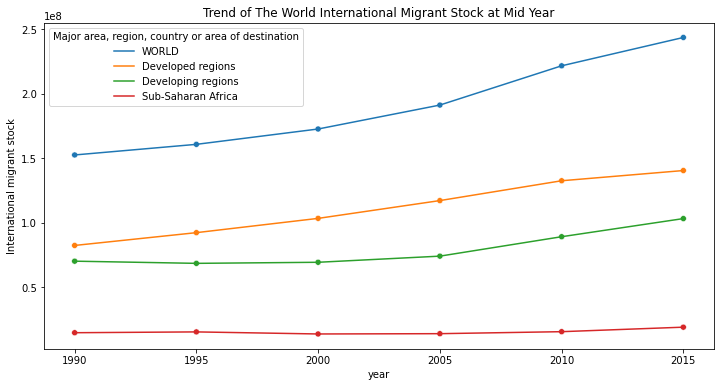

In [5]:
# Line plot of world and Three Regions International migrant stock on year and gender
plt.figure(figsize=(12, 6))
region = ['WORLD', 'Developed regions', 'Developing regions', 'Sub-Saharan Africa']
Region = df['Table 1'].loc[df['Table 1']['Major area, region, country or area of destination'].isin(region)]
sns.lineplot(data=Region[Region['gender'] == 'both sexes'], x="year", y="International migrant stock", hue="Major area, region, country or area of destination")
sns.scatterplot(data = Region[Region['gender'] == 'both sexes'], x='year', y='International migrant stock', hue='Major area, region, country or area of destination', legend=False)
plt.title('Trend of The World International Migrant Stock at Mid Year')
plt.show()

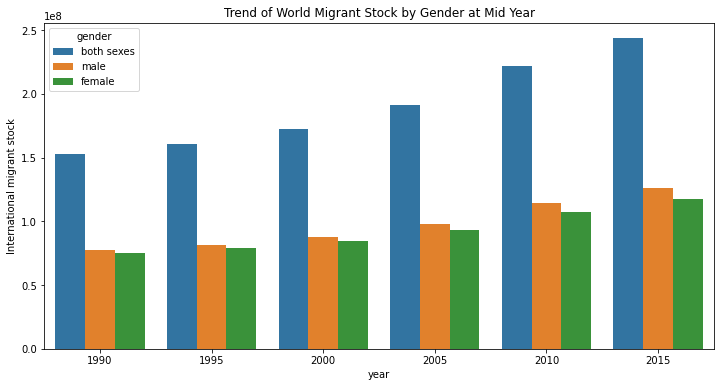

In [6]:
#Barplot of World International migrant stock by gender at mid year
plt.figure(figsize=(12, 6))
sns.barplot(data = df['Table 1'][df['Table 1']['Major area, region, country or area of destination'] == 'WORLD'], 
            x='year', y='International migrant stock', hue='gender')
plt.title('Trend of World Migrant Stock by Gender at Mid Year')
plt.show()

In [7]:
#country area 
df['Table 1']['Major area, region, country or area of destination'] = df['Table 1'].loc[df['Table 1']['Major area, region, country or area of destination'].isin(df['ANNEX']['Country or area']), 'Major area, region, country or area of destination']

#drop NaN value in Major area, region, country or area of destination 
df['Table 1'] = (df['Table 1'].
                 dropna(subset=['Major area, region, country or area of destination']).
                 rename(columns={'Major area, region, country or area of destination' : 'Country or area'}).
                 reset_index().
                 drop(columns='index'))

#merge table and annex
df['Table 1'] = df['Table 1'].merge(df['ANNEX'].drop(columns=['Code', 'Sort order','Sort order.1', 
                                              'Sort order.2', 'Code.1','Country code']), 
                    how='left', left_on= 'Country or area', right_on = 'Country or area')
df['Table 1']['International migrant stock'] = df['Table 1']['International migrant stock'].apply(lambda x: np.nan if x=='..' else x)

In [8]:
df['Table 1']

,Sort\norder,Country or area,Notes,Country code,Type of data (a),International migrant stock,year,gender,Major area,Region,Developed region,Least developed country,Sub-Saharan Africa
0,9.0,Burundi,NaN,108.0,B R,333110.0,1990,both sexes,Africa,Eastern Africa,No,Yes,Yes
1,10.0,Comoros,NaN,174.0,B,14079.0,1990,both sexes,Africa,Eastern Africa,No,Yes,Yes
2,11.0,Djibouti,NaN,262.0,B R,122221.0,1990,both sexes,Africa,Eastern Africa,No,Yes,Yes
3,12.0,Eritrea,NaN,232.0,I,11848.0,1990,both sexes,Africa,Eastern Africa,No,Yes,Yes
4,13.0,Ethiopia,NaN,231.0,B R,1155390.0,1990,both sexes,Africa,Eastern Africa,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,261.0,Samoa,NaN,882.0,B,2460.0,2015,female,Oceania,Polynesia,No,No,No
4172,262.0,Tokelau,NaN,772.0,B,254.0,2015,female,Oceania,Polynesia,No,No,No
4173,263.0,Tonga,NaN,776.0,B,2604.0,2015,female,Oceania,Polynesia,No,No,No
4174,264.0,Tuvalu,NaN,798.0,C,63.0,2015,female,Oceania,Polynesia,No,Yes,No


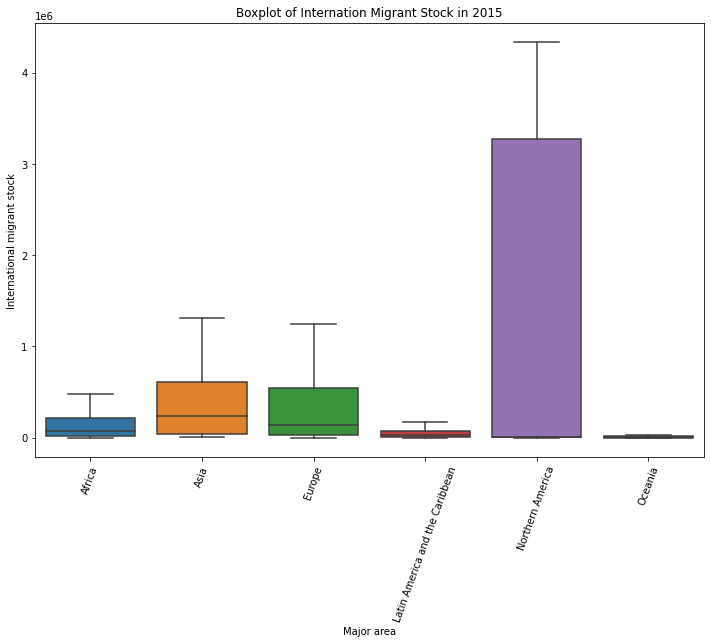

In [9]:
#Boxplot of major area female migrants at mid year
plt.figure(figsize=(12, 8))
sns.boxplot(data = df['Table 1'][df['Table 1']['year'] == 1990], x = 'Major area', y = 'International migrant stock', showfliers = False)
plt.xticks(rotation=70)
plt.title('Boxplot of Internation Migrant Stock in 2015')
plt.show()

## Table 2

In [10]:
df['Table 2'] = df['Table 2'].rename(columns=lambda x: x if np.isnan(df['Table 2'].iloc[0][x]) 
                                     else x+str(int(df['Table 2'].iloc[0][x]))).iloc[1:]
#year
df['Table 2'] = (df['Table 2'].
                 melt(id_vars = ["Sort\norder", "Major area, region, country or area of destination", 
                                 "Notes", "Country code"], 
                      var_name="gender_year", 
                      value_name="Total population (thousands)").
                 assign(year = lambda x: x.gender_year.str[-4:].astype(int), 
                        gender = lambda x: x.gender_year.str[0:-4].astype(str)).
                 drop(columns = 'gender_year')
                )

df['Table 2']['gender'] = df['Table 2']['gender'].apply(lambda x: np.nan if x.startswith('Unnamed') else x)

df['Table 2'].loc[:,['gender']] = df['Table 2'].loc[:,['gender']].ffill()

df['Table 2']['gender'] = df['Table 2']['gender'].apply(lambda x: x[20:30] 
                                                        if x.startswith('Total population of both sexes') 
                                                        else x[6:-35])
df['Table 2']['Total population (thousands)'] = df['Table 2']['Total population (thousands)'].apply(lambda x: np.nan if x=='..' else x)

In [11]:
df['Table 2']

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Total population (thousands),year,gender
0,1.0,WORLD,NaN,900.0,5309667.699,1990,both sexes
1,2.0,Developed regions,(b),901.0,1144463.062,1990,both sexes
2,3.0,Developing regions,(c),902.0,4165204.637,1990,both sexes
3,4.0,Least developed countries,(d),941.0,510057.629,1990,both sexes
4,5.0,Less developed regions excluding least develop...,NaN,934.0,3655147.008,1990,both sexes
...,...,...,...,...,...,...,...
4765,261.0,Samoa,NaN,882.0,93.584,2015,female
4766,262.0,Tokelau,NaN,772.0,NaN,2015,female
4767,263.0,Tonga,NaN,776.0,52.931,2015,female
4768,264.0,Tuvalu,NaN,798.0,NaN,2015,female


In [12]:
Major_area = df['ANNEX']['Major area'].unique().tolist()
#select all the rows which are the major area
Major2 = df['Table 2'][(df['Table 2']['Major area, region, country or area of destination'].isin(Major_area))]
#select all the gender is both sexes
Major2 = Major2[Major2['gender'] == 'both sexes']
Major2 = Major2.rename(columns = {'Major area, region, country or area of destination' : 'Major area'})

In [13]:
Major2['Major area'] = Major2['Major area'].apply(lambda x: 'LAME' if x == 'Latin America and the Caribbean' else x)

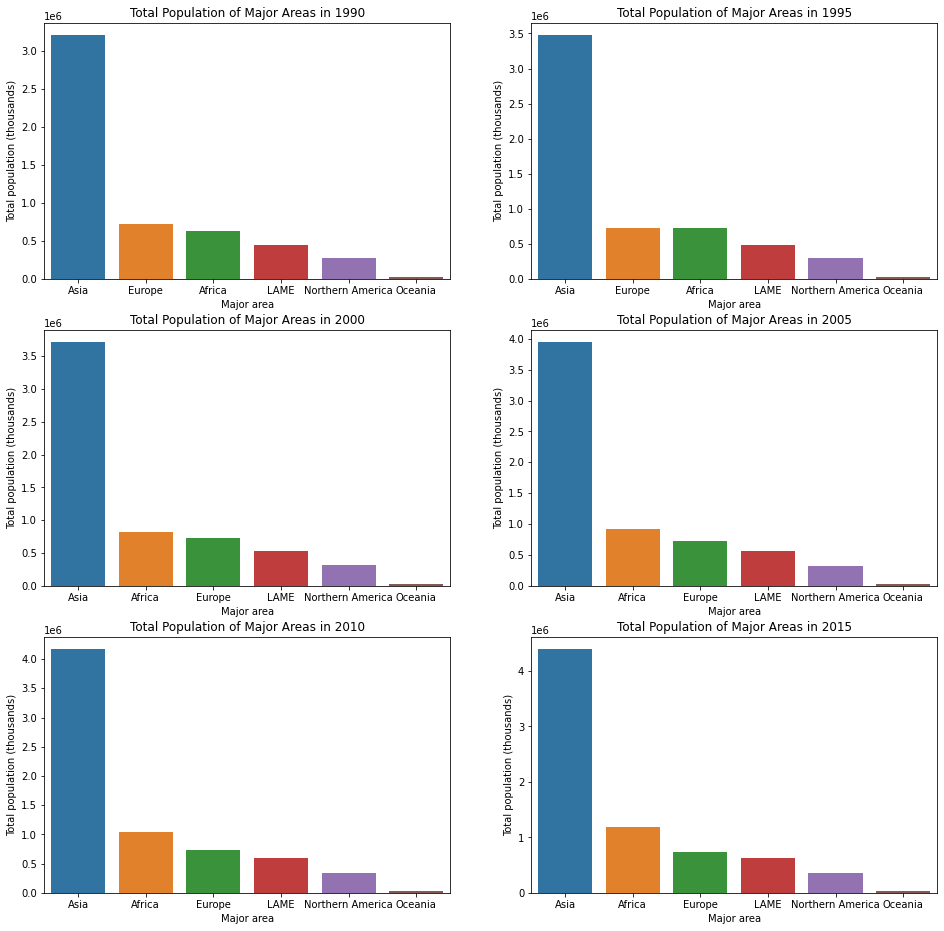

In [14]:
plt.figure(figsize=(16, 16))
plt.subplot(3, 2, 1)
sns.barplot(x='Major area', y='Total population (thousands)', data=Major2[Major2['year'] == 1990].
            sort_values(by = 'Total population (thousands)', ascending=False))
plt.title("Total Population of Major Areas in 1990")
plt.subplot(3, 2, 2)
sns.barplot(x='Major area', y='Total population (thousands)', data=Major2[Major2['year'] == 1995].
            sort_values(by = 'Total population (thousands)', ascending=False))
plt.title("Total Population of Major Areas in 1995")
plt.subplot(3, 2, 3)
sns.barplot(x='Major area', y='Total population (thousands)', data=Major2[Major2['year'] == 2000].
            sort_values(by = 'Total population (thousands)', ascending=False))
plt.title("Total Population of Major Areas in 2000")
plt.subplot(3, 2, 4)
sns.barplot(x='Major area', y='Total population (thousands)', data=Major2[Major2['year'] == 2005].
            sort_values(by = 'Total population (thousands)', ascending=False))
plt.title("Total Population of Major Areas in 2005")
plt.subplot(3, 2, 5)
sns.barplot(x='Major area', y='Total population (thousands)', data=Major2[Major2['year'] == 2010].
            sort_values(by = 'Total population (thousands)', ascending=False))
plt.title("Total Population of Major Areas in 2010")
plt.subplot(3, 2, 6)
sns.barplot(x='Major area', y='Total population (thousands)', data=Major2[Major2['year'] == 2015].
            sort_values(by = 'Total population (thousands)', ascending=False))
plt.title("Total Population of Major Areas in 2015")
plt.show()

## Table 3

In [15]:
#combine column name and first rwo to rename column
df['Table 3'] = df['Table 3'].rename(columns=lambda x: x if np.isnan(df['Table 3'].iloc[0][x]) 
                                     else x+str(int(df['Table 3'].iloc[0][x]))).iloc[1:]
#year
df['Table 3'] = (df['Table 3'].
                 melt(id_vars = ["Sort\norder", "Major area, region, country or area of destination", 
                                 "Notes", "Country code", "Type of data (a)"], 
                      var_name="genderyear", 
                      value_name="International migrant stock as a percentage of the total population").
                 assign(year = lambda x: x.genderyear.str[-4:].astype(int), 
                        gender = lambda x: x.genderyear.str[0:-4].astype(str)).
                 drop(columns = 'genderyear')
                )
df['Table 3']['gender'] = df['Table 3']['gender'].apply(lambda x: np.nan if x.startswith('Unnamed') else x)
df['Table 3'].loc[:,['gender']] = df['Table 3'].loc[:,['gender']].ffill()
##gender
df['Table 3']['gender'] = df['Table 3']['gender'].apply(lambda x: x[69:-1])
df['Table 3']['International migrant stock as a percentage of the total population'] = df['Table 3']['International migrant stock as a percentage of the total population'].apply(lambda x: np.nan if x=='..' else x)

In [16]:
df['Table 3']

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock as a percentage of the total population,year,gender
0,1.0,WORLD,NaN,900.0,NaN,2.873310,1990,both sexes
1,2.0,Developed regions,(b),901.0,NaN,7.198015,1990,both sexes
2,3.0,Developing regions,(c),902.0,NaN,1.685021,1990,both sexes
3,4.0,Least developed countries,(d),941.0,NaN,2.171513,1990,both sexes
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,1.617042,1990,both sexes
...,...,...,...,...,...,...,...,...
4765,261.0,Samoa,NaN,882.0,B,2.628654,2015,female
4766,262.0,Tokelau,NaN,772.0,B,NaN,2015,female
4767,263.0,Tonga,NaN,776.0,B,4.919612,2015,female
4768,264.0,Tuvalu,NaN,798.0,C,NaN,2015,female


In [17]:
#select all the rows which are the major area
Major3 = df['Table 3'][(df['Table 3']['Major area, region, country or area of destination'].isin(Major_area))]
#select all the gender is both sexes
Major3 = Major3[Major3['gender'] == 'both sexes']
Major3 = Major3.rename(columns = {'Major area, region, country or area of destination' : 'Major area'})

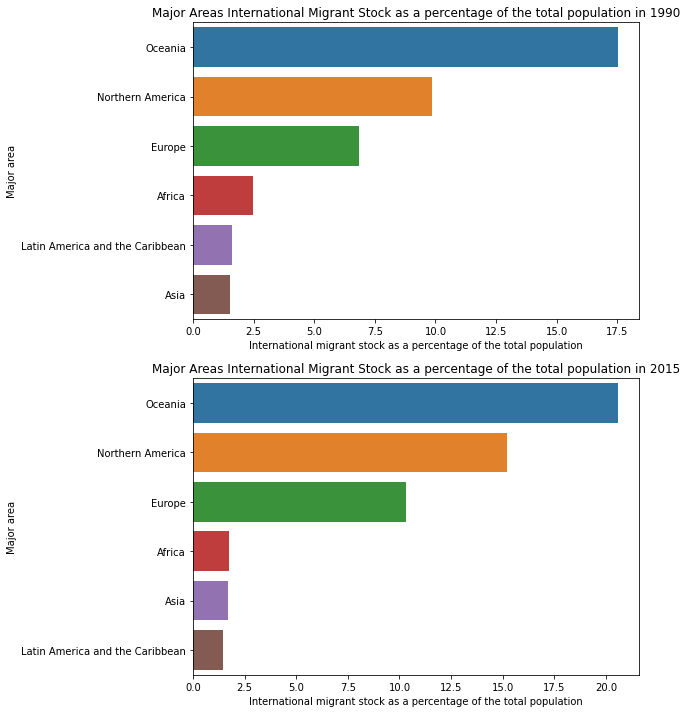

In [18]:
plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
sns.barplot(y='Major area', x='International migrant stock as a percentage of the total population', data=Major3[Major3['year'] == 1990].
            sort_values(by = 'International migrant stock as a percentage of the total population', ascending=False))
plt.title('Major Areas International Migrant Stock as a percentage of the total population in 1990')
plt.subplot(2, 1, 2)
sns.barplot(y='Major area', x='International migrant stock as a percentage of the total population', data=Major3[Major3['year'] == 2015].
            sort_values(by = 'International migrant stock as a percentage of the total population', ascending=False))
plt.title('Major Areas International Migrant Stock as a percentage of the total population in 2015')

plt.show()

## Table 4

In [19]:
#combine column name and first rwo to rename column
df['Table 4'] = df['Table 4'].rename(columns=lambda x: x if np.isnan(df['Table 4'].iloc[0][x]) 
                                     else x+str(int(df['Table 4'].iloc[0][x]))).iloc[1:]
#year
df['Table 4'] = (df['Table 4'].
                 melt(id_vars = ["Sort\norder", "Major area, region, country or area of destination", 
                                 "Notes", "Country code", "Type of data (a)"], 
                      var_name="genderyear", 
                      value_name="Migrants as a percentage of the international migrant stock").
                 assign(year = lambda x: x.genderyear.str[-4:].astype(int), 
                        gender = lambda x: x.genderyear.str[0:-4].astype(str)).
                 drop(columns = 'genderyear')
                )
df['Table 4']['gender'] = df['Table 4']['gender'].apply(lambda x: np.nan if x.startswith('Unnamed') else x)
df['Table 4'].loc[:,['gender']] = df['Table 4'].loc[:,['gender']].ffill()
df['Table 4']['gender'] = df['Table 4']['gender'].apply(lambda x: x[0:7])
df['Table 4']

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Migrants as a percentage of the international migrant stock,year,gender
0,1.0,WORLD,NaN,900.0,NaN,49.03915,1990,Female
1,2.0,Developed regions,(b),901.0,NaN,51.123977,1990,Female
2,3.0,Developing regions,(c),902.0,NaN,46.592099,1990,Female
3,4.0,Least developed countries,(d),941.0,NaN,47.261155,1990,Female
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,46.466684,1990,Female
...,...,...,...,...,...,...,...,...
1585,261.0,Samoa,NaN,882.0,B,49.908704,2015,Female
1586,262.0,Tokelau,NaN,772.0,B,52.156057,2015,Female
1587,263.0,Tonga,NaN,776.0,B,45.437096,2015,Female
1588,264.0,Tuvalu,NaN,798.0,C,44.680851,2015,Female


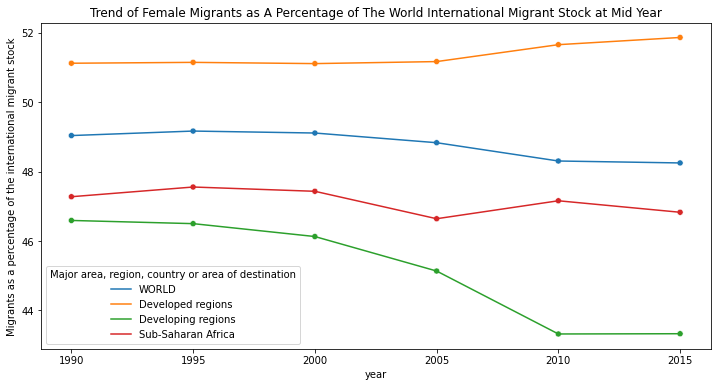

In [20]:
# Line plot of world and Three Regions Female International migrant stock at mid year
plt.figure(figsize=(12, 6))
region = ['WORLD', 'Developed regions', 'Developing regions', 'Sub-Saharan Africa']
Region = df['Table 4'].loc[df['Table 4']['Major area, region, country or area of destination'].isin(region)]
sns.lineplot(data=Region, x="year", y="Migrants as a percentage of the international migrant stock", hue="Major area, region, country or area of destination")
sns.scatterplot(data = Region, x='year', y='Migrants as a percentage of the international migrant stock', hue='Major area, region, country or area of destination', legend=False)
plt.title('Trend of Female Migrants as A Percentage of The World International Migrant Stock at Mid Year')
plt.show()

In [21]:
#country area 
df['Table 4']['Major area, region, country or area of destination'] = df['Table 4'].loc[df['Table 4']['Major area, region, country or area of destination'].isin(df['ANNEX']['Country or area']), 'Major area, region, country or area of destination']

#drop NaN value in Major area, region, country or area of destination 
df['Table 4'] = (df['Table 4'].
                 dropna(subset=['Major area, region, country or area of destination']).
                 rename(columns={'Major area, region, country or area of destination' : 'Country or area'}).
                 reset_index().
                 drop(columns='index'))

df['Table 4'] = df['Table 4'].merge(df['ANNEX'].drop(columns=['Code', 'Sort order','Sort order.1', 
                                              'Sort order.2', 'Code.1','Country code']), 
                    how='left', left_on= 'Country or area', right_on = 'Country or area')
df['Table 4']

,Sort\norder,Country or area,Notes,Country code,Type of data (a),Migrants as a percentage of the international migrant stock,year,gender,Major area,Region,Developed region,Least developed country,Sub-Saharan Africa
0,9.0,Burundi,NaN,108.0,B R,50.987061,1990,Female,Africa,Eastern Africa,No,Yes,Yes
1,10.0,Comoros,NaN,174.0,B,52.290646,1990,Female,Africa,Eastern Africa,No,Yes,Yes
2,11.0,Djibouti,NaN,262.0,B R,47.437838,1990,Female,Africa,Eastern Africa,No,Yes,Yes
3,12.0,Eritrea,NaN,232.0,I,47.434166,1990,Female,Africa,Eastern Africa,No,Yes,Yes
4,13.0,Ethiopia,NaN,231.0,B R,47.439047,1990,Female,Africa,Eastern Africa,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,261.0,Samoa,NaN,882.0,B,49.908704,2015,Female,Oceania,Polynesia,No,No,No
1388,262.0,Tokelau,NaN,772.0,B,52.156057,2015,Female,Oceania,Polynesia,No,No,No
1389,263.0,Tonga,NaN,776.0,B,45.437096,2015,Female,Oceania,Polynesia,No,No,No
1390,264.0,Tuvalu,NaN,798.0,C,44.680851,2015,Female,Oceania,Polynesia,No,Yes,No


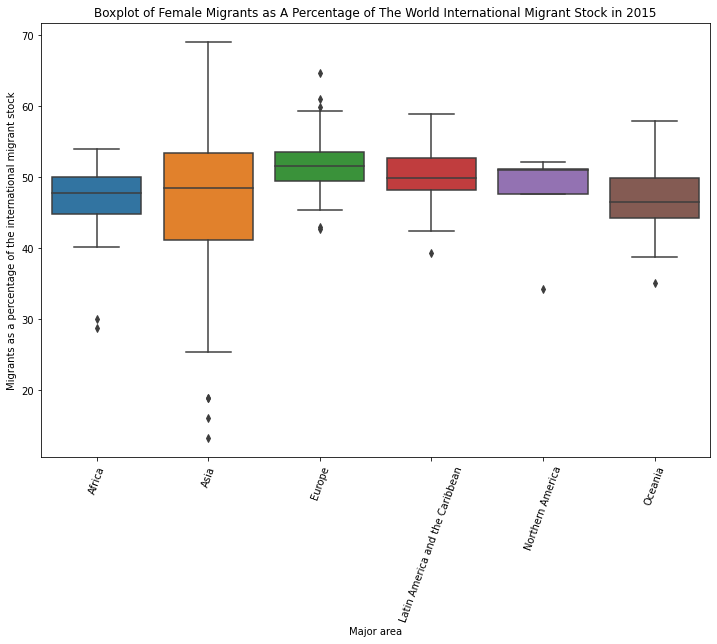

In [22]:
#Boxplot of major area female migrants at mid year
plt.figure(figsize=(12, 8))
sns.boxplot(data = df['Table 4'][df['Table 4']['year'] == 2015], x = 'Major area', y = 'Migrants as a percentage of the international migrant stock')
plt.xticks(rotation=70)
plt.title('Boxplot of Female Migrants as A Percentage of The World International Migrant Stock in 2015')
plt.show()

## Table 5

In [24]:
#combine column name and first rwo to rename column
df['Table 5'] = df['Table 5'].rename(columns=lambda x: x if pd.isna(df['Table 5'].iloc[0][x]) 
                                     else x + df['Table 5'].iloc[0][x]).iloc[1:]

#year interval
df['Table 5'] = (df['Table 5'].
                 melt(id_vars = ["Sort\norder", "Major area, region, country or area of destination", 
                                 "Notes", "Country code", "Type of data (a)"], 
                      var_name="genderyear", 
                      value_name="Annual rate of change of the migrant stock").
                 assign(year = lambda x: x.genderyear.str[-9:].astype(str), 
                        gender = lambda x: x.genderyear.str[0:-9].astype(str)).
                 drop(columns = 'genderyear')
                )
df['Table 5']['gender'] = df['Table 5']['gender'].apply(lambda x: np.nan if x.startswith('Unnamed') else x)
df['Table 5'].loc[:,['gender']] = df['Table 5'].loc[:,['gender']].ffill()
##gender
df['Table 5']['gender'] = df['Table 5']['gender'].apply(lambda x: x[44:-1])
##replace '..' in the value with NaN
df['Table 5']['Annual rate of change of the migrant stock'] = df['Table 5']['Annual rate of change of the migrant stock'].apply(lambda x: np.nan if x=='..' else x)
df['Table 5']

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Annual rate of change of the migrant stock,year,gender
0,1.0,WORLD,NaN,900.0,NaN,1.051865,1990-1995,both sexes
1,2.0,Developed regions,(b),901.0,NaN,2.275847,1990-1995,both sexes
2,3.0,Developing regions,(c),902.0,NaN,-0.487389,1990-1995,both sexes
3,4.0,Least developed countries,(d),941.0,NaN,1.118175,1990-1995,both sexes
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,-0.803244,1990-1995,both sexes
...,...,...,...,...,...,...,...,...
3970,261.0,Samoa,NaN,882.0,B,-0.545343,2010-2015,female
3971,262.0,Tokelau,NaN,772.0,B,2.603250,2010-2015,female
3972,263.0,Tonga,NaN,776.0,B,2.526318,2010-2015,female
3973,264.0,Tuvalu,NaN,798.0,C,-1.819436,2010-2015,female


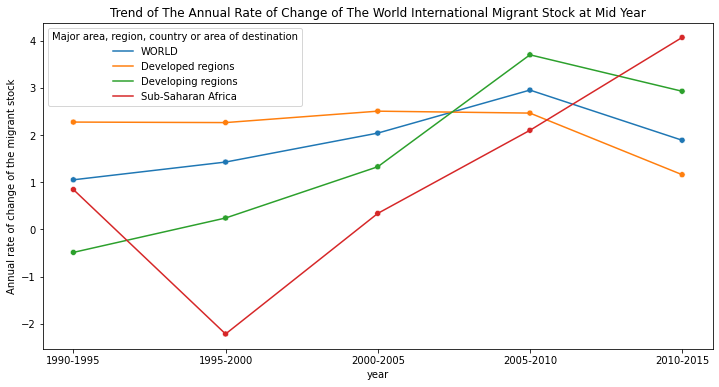

In [25]:
# Line plot of world and Three Regions International migrant stock on year and gender
plt.figure(figsize=(12, 6))
region = ['WORLD', 'Developed regions', 'Developing regions', 'Sub-Saharan Africa']
Region = df['Table 5'].loc[df['Table 5']['Major area, region, country or area of destination'].isin(region)]
sns.lineplot(data=Region[Region['gender'] == 'both sexes'], x="year", y="Annual rate of change of the migrant stock", hue="Major area, region, country or area of destination")
sns.scatterplot(data = Region[Region['gender'] == 'both sexes'], x='year', y='Annual rate of change of the migrant stock', hue='Major area, region, country or area of destination', legend=False)
plt.title('Trend of The Annual Rate of Change of The World International Migrant Stock at Mid Year')
plt.show()

In [26]:
#select all the rows which are the major area
Major5 = df['Table 5'][(df['Table 5']['Major area, region, country or area of destination'].isin(Major_area))]
Major5 = Major5.rename(columns = {'Major area, region, country or area of destination' : 'Major area'})

In [27]:
Major5

,Sort\norder,Major area,Notes,Country code,Type of data (a),Annual rate of change of the migrant stock,year,gender
6,7.0,Africa,NaN,903.0,NaN,0.826734,1990-1995,both sexes
70,71.0,Asia,NaN,935.0,NaN,-0.673431,1990-1995,both sexes
126,127.0,Europe,NaN,908.0,NaN,1.420702,1990-1995,both sexes
179,180.0,Latin America and the Caribbean,NaN,904.0,NaN,-1.371210,1990-1995,both sexes
231,232.0,Northern America,NaN,905.0,NaN,3.771892,1990-1995,both sexes
...,...,...,...,...,...,...,...,...
3780,71.0,Asia,NaN,935.0,NaN,2.583965,2010-2015,female
3836,127.0,Europe,NaN,908.0,NaN,1.121519,2010-2015,female
3889,180.0,Latin America and the Caribbean,NaN,904.0,NaN,2.288607,2010-2015,female
3941,232.0,Northern America,NaN,905.0,NaN,1.292130,2010-2015,female


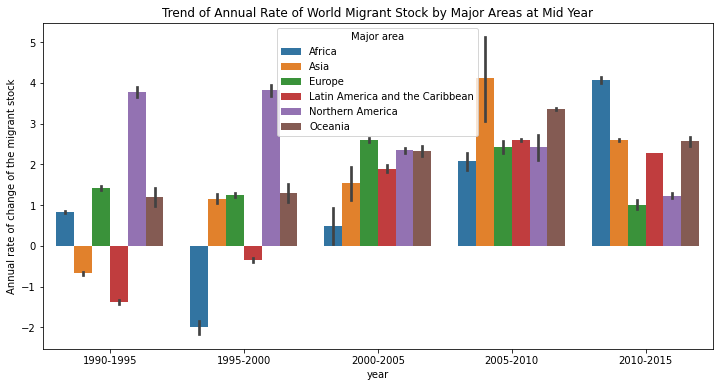

In [28]:
#Barplot of Annual rate of change of the migrant stock by Major area at mid year
plt.figure(figsize=(12, 6))
sns.barplot(data = Major5, x='year', y='Annual rate of change of the migrant stock', hue='Major area')
plt.title('Trend of Annual Rate of World Migrant Stock by Major Areas at Mid Year')
plt.show()

## Table 6

In [29]:
df['Table 7'] = df['Table 6'][['Sort\norder', 'Major area, region, country or area of destination',
       'Notes', 'Country code', 'Type of data (a)', 'Refugees as a percentage of the international migrant stock',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15','Unnamed: 16']]

#combine column name and first rwo to rename column
df['Table 7'] = df['Table 7'].rename(columns=lambda x: x if np.isnan(df['Table 7'].iloc[0][x]) 
                                     else x+str(int(df['Table 7'].iloc[0][x]))).iloc[1:]

#year
df['Table 7'] = (df['Table 7'].
                 melt(id_vars = ["Sort\norder", "Major area, region, country or area of destination", 
                                 "Notes", "Country code", "Type of data (a)"], 
                      var_name="years", 
                      value_name="Refugees as a percentage of the international migrant stock").
                 assign(year = lambda x: x.years.str[-4:].astype(int)).
                 drop(columns = 'years')
                )

#country area 
df['Table 7']['Major area, region, country or area of destination'] = df['Table 7'].loc[df['Table 7']['Major area, region, country or area of destination'].isin(df['ANNEX']['Country or area']), 'Major area, region, country or area of destination']

#drop NaN value in Major area, region, country or area of destination 
df['Table 7'] = (df['Table 7'].
                 dropna(subset=['Major area, region, country or area of destination']).
                 rename(columns={'Major area, region, country or area of destination' : 'Country or area'}).
                 reset_index().
                 drop(columns='index'))


df['Table 7'] = df['Table 7'].merge(df['ANNEX'].drop(columns=['Code', 'Sort order','Sort order.1', 
                                              'Sort order.2', 'Code.1','Country code']), 
                    how='left', left_on= 'Country or area', right_on = 'Country or area')
df['Table 7']['Refugees as a percentage of the international migrant stock'] = df['Table 7']['Refugees as a percentage of the international migrant stock'].apply(lambda x: np.nan if x=='..' else x)


In [30]:
df['Table 7']

,Sort\norder,Country or area,Notes,Country code,Type of data (a),Refugees as a percentage of the international migrant stock,year,Major area,Region,Developed region,Least developed country,Sub-Saharan Africa
0,9.0,Burundi,NaN,108.0,B R,80.432590,1990,Africa,Eastern Africa,No,Yes,Yes
1,10.0,Comoros,NaN,174.0,B,0.000000,1990,Africa,Eastern Africa,No,Yes,Yes
2,11.0,Djibouti,NaN,262.0,B R,44.597901,1990,Africa,Eastern Africa,No,Yes,Yes
3,12.0,Eritrea,NaN,232.0,I,0.000000,1990,Africa,Eastern Africa,No,Yes,Yes
4,13.0,Ethiopia,NaN,231.0,B R,64.217710,1990,Africa,Eastern Africa,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,261.0,Samoa,NaN,882.0,B,0.000000,2015,Oceania,Polynesia,No,No,No
1388,262.0,Tokelau,NaN,772.0,B,0.000000,2015,Oceania,Polynesia,No,No,No
1389,263.0,Tonga,NaN,776.0,B,0.000000,2015,Oceania,Polynesia,No,No,No
1390,264.0,Tuvalu,NaN,798.0,C,0.000000,2015,Oceania,Polynesia,No,Yes,No


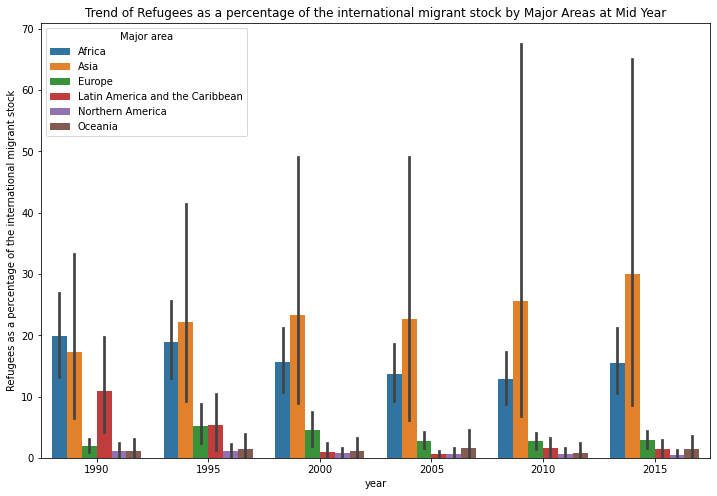

In [31]:
#Barplot of Refugees as a percentage of the international migrant stock by Major area at mid year
plt.figure(figsize=(12, 8))
sns.barplot(data = df['Table 7'], x='year', y='Refugees as a percentage of the international migrant stock', hue='Major area')
plt.title('Trend of Refugees as a percentage of the international migrant stock by Major Areas at Mid Year')
plt.show()

In [32]:
df['Table 8'] = df['Table 6'][['Sort\norder', 'Major area, region, country or area of destination',
       'Notes', 'Country code', 'Type of data (a)','Annual rate of change of the refugee stock','Unnamed: 18', 
                               'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21']]

#combine column name and first rwo to rename column
df['Table 8'] = df['Table 8'].rename(columns=lambda x: x if pd.isna(df['Table 8'].iloc[0][x]) 
                                     else x+str(df['Table 8'].iloc[0][x])).iloc[1:]

#year
df['Table 8'] = (df['Table 8'].
                 melt(id_vars = ["Sort\norder", "Major area, region, country or area of destination", 
                                 "Notes", "Country code", "Type of data (a)"], 
                      var_name="yearinterval", 
                      value_name="Annual rate of change of the refugee stock").
                 assign(year = lambda x: x.yearinterval.str[-9:].astype(str)).
                 drop(columns = 'yearinterval')
                )

#country area 
df['Table 8']['Major area, region, country or area of destination'] = df['Table 8'].loc[df['Table 8']['Major area, region, country or area of destination'].isin(df['ANNEX']['Country or area']), 'Major area, region, country or area of destination']

#drop NaN value in Major area, region, country or area of destination 
df['Table 8'] = (df['Table 8'].
                 dropna(subset=['Major area, region, country or area of destination']).
                 rename(columns={'Major area, region, country or area of destination' : 'Country or area'}).
                 reset_index().
                 drop(columns='index'))

df['Table 8'] = df['Table 8'].merge(df['ANNEX'].drop(columns=['Code', 'Sort order','Sort order.1', 
                                              'Sort order.2', 'Code.1','Country code']), 
                    how='left', on= 'Country or area')

df['Table 8']['Annual rate of change of the refugee stock'] = df['Table 8']['Annual rate of change of the refugee stock'].apply(lambda x: np.nan if x=='..' else x)


In [33]:
df['Table 8']

,Sort\norder,Country or area,Notes,Country code,Type of data (a),Annual rate of change of the refugee stock,year,Major area,Region,Developed region,Least developed country,Sub-Saharan Africa
0,9.0,Burundi,NaN,108.0,B R,-3.390926,1990-1995,Africa,Eastern Africa,No,Yes,Yes
1,10.0,Comoros,NaN,174.0,B,NaN,1990-1995,Africa,Eastern Africa,No,Yes,Yes
2,11.0,Djibouti,NaN,262.0,B R,-9.763426,1990-1995,Africa,Eastern Africa,No,Yes,Yes
3,12.0,Eritrea,NaN,232.0,I,NaN,1990-1995,Africa,Eastern Africa,No,Yes,Yes
4,13.0,Ethiopia,NaN,231.0,B R,-5.505717,1990-1995,Africa,Eastern Africa,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1155,261.0,Samoa,NaN,882.0,B,NaN,2010-2015,Oceania,Polynesia,No,No,No
1156,262.0,Tokelau,NaN,772.0,B,NaN,2010-2015,Oceania,Polynesia,No,No,No
1157,263.0,Tonga,NaN,776.0,B,NaN,2010-2015,Oceania,Polynesia,No,No,No
1158,264.0,Tuvalu,NaN,798.0,C,NaN,2010-2015,Oceania,Polynesia,No,Yes,No


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


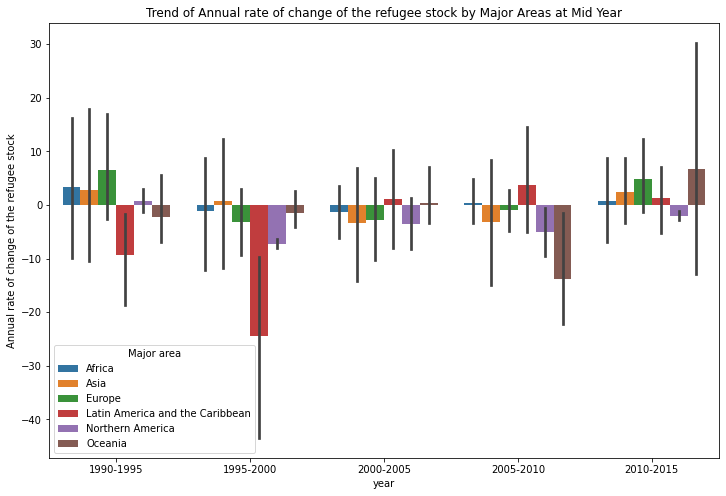

In [34]:
#Barplot of Annual rate of change of the refugee stock by Major area at mid year
plt.figure(figsize=(12, 8))
sns.barplot(data = df['Table 8'], x='year', y='Annual rate of change of the refugee stock', hue='Major area')
plt.title('Trend of Annual rate of change of the refugee stock by Major Areas at Mid Year')
plt.show()

In [35]:
df['Table 6'] = df['Table 6'][['Sort\norder', 'Major area, region, country or area of destination',
       'Notes', 'Country code', 'Type of data (a)','Estimated refugee stock at mid-year (both sexes)', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']]

#combine column name and first rwo to rename column
df['Table 6'] = df['Table 6'].rename(columns=lambda x: x if np.isnan(df['Table 6'].iloc[0][x]) 
                                     else x+str(df['Table 6'].iloc[0][x])).iloc[1:]

#year
df['Table 6'] = (df['Table 6'].
                 melt(id_vars = ["Sort\norder", "Major area, region, country or area of destination", 
                                 "Notes", "Country code", "Type of data (a)"], 
                      var_name="genderyear", 
                      value_name="Estimated refugee stock").
                 assign(year = lambda x: x.genderyear.str[-4:].astype(int), 
                        gender = lambda x: x.genderyear.str[0:-4].astype(str)).
                 drop(columns = 'genderyear')
                )

df['Table 6']['gender'] = df['Table 6']['gender'].apply(lambda x: np.nan if x.startswith('Unnamed') else x)

df['Table 6'].loc[:,['gender']] = df['Table 6'].loc[:,['gender']].ffill()

##gender 
df['Table 6']['gender'] = df['Table 6']['gender'].apply(lambda x: x[37:-1])

#country area 
df['Table 6']['Major area, region, country or area of destination'] = df['Table 6'].loc[df['Table 6']['Major area, region, country or area of destination'].isin(df['ANNEX']['Country or area']), 'Major area, region, country or area of destination']

#drop NaN value in Major area, region, country or area of destination 
df['Table 6'] = (df['Table 6'].
                 dropna(subset=['Major area, region, country or area of destination']).
                 rename(columns={'Major area, region, country or area of destination' : 'Country or area'}).
                 reset_index().
                 drop(columns='index'))

df['Table 6'] = df['Table 6'].merge(df['ANNEX'].drop(columns=['Code', 'Sort order','Sort order.1', 
                                              'Sort order.2', 'Code.1','Country code']), 
                    how='left', on= 'Country or area')

In [36]:
df['Table 6']

,Sort\norder,Country or area,Notes,Country code,Type of data (a),Estimated refugee stock,year,gender,Major area,Region,Developed region,Least developed country,Sub-Saharan Africa
0,9.0,Burundi,NaN,108.0,B R,267929,1990,both sexes,Africa,Eastern Africa,No,Yes,Yes
1,10.0,Comoros,NaN,174.0,B,0,1990,both sexes,Africa,Eastern Africa,No,Yes,Yes
2,11.0,Djibouti,NaN,262.0,B R,54508,1990,both sexes,Africa,Eastern Africa,No,Yes,Yes
3,12.0,Eritrea,NaN,232.0,I,0,1990,both sexes,Africa,Eastern Africa,No,Yes,Yes
4,13.0,Ethiopia,NaN,231.0,B R,741965,1990,both sexes,Africa,Eastern Africa,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,261.0,Samoa,NaN,882.0,B,0,2015,both sexes,Oceania,Polynesia,No,No,No
1388,262.0,Tokelau,NaN,772.0,B,0,2015,both sexes,Oceania,Polynesia,No,No,No
1389,263.0,Tonga,NaN,776.0,B,0,2015,both sexes,Oceania,Polynesia,No,No,No
1390,264.0,Tuvalu,NaN,798.0,C,0,2015,both sexes,Oceania,Polynesia,No,Yes,No


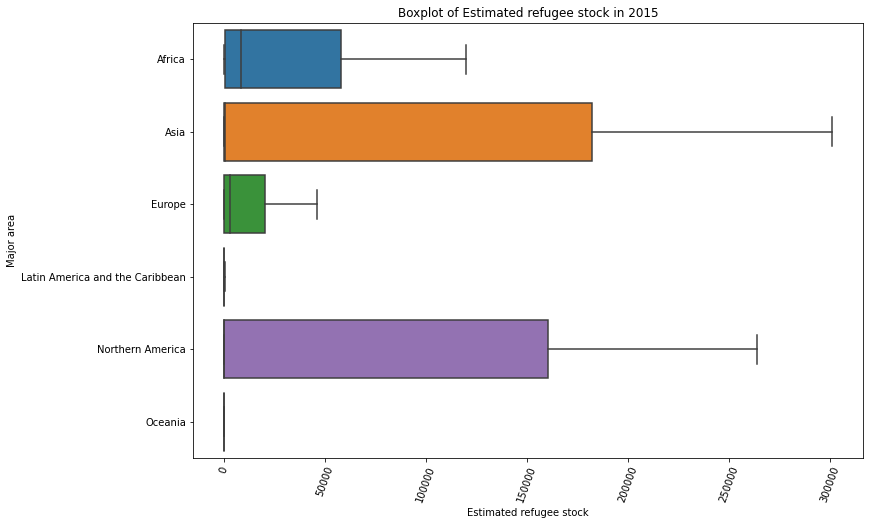

In [37]:
#Boxplot of major area Estimated refugee stock at mid year
plt.figure(figsize=(12, 8))
sns.boxplot(data = df['Table 6'][df['Table 6']['year'] == 2015], y = 'Major area', x = 'Estimated refugee stock', showfliers = False)
plt.xticks(rotation=70)
plt.title('Boxplot of Estimated refugee stock in 2015')
plt.show()